# El MEF para vigas. 
## Funciones de forma hermíticas. 

Análisis de Estructuras. Grado en Ingeniería Civil. 

Autor: 

+ Alejandro E. Martínez-Castro, Esther Puertas García, Rafael Gallego.
+ Departamento de Mecánica de Estructuras e Ingeniería Hidráulica. Universidad de Granada.


En este cuaderno se presenta un procedimiento sistemático que permite obtener cualquier base de funciones de forma. 

En primer lugar se obtiene la base hermítica de funciones cúbicas. 

Finalmente se plantean dos ejercicios, en los que se plantean otras bases de funciones. 

## Introducción

El elemento más utilizado en problemas de flexión de vigas de Bernoulli-Euler (vigas esbeltas) es el cúbico de 2 nodos. Este elemento tiene en cada nodo, 2 grados de libertad (desplazamiento vertical y giro), análogo al elemento-barra (P2D) visto en Cálculo Matricial.  

Para este cuaderno se va a emplear el paquete de cálculo simbólico de Python denominado [SymPy](http://www.sympy.org/es/). Dentro del entorno del servidor Jupyter, hay un enlace a SymPy directamente en la pestaña de ayuda "Help". 

Hay varias formas de obtener SymPy

- Desde Anaconda, con el comando: 
      conda install sympy
  Este comando puede ejecutarse desde una terminal de Windows (comando CMD), o en Linux / Mac, directamente desde una shell. 

- Mediante el instalador pip:
      pip install sympy 

In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 0.7.6.1 (Python 2.7.11-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


Esto permite que se carguen una serie de variables y funciones por defecto. 

A continuación se definirá un nuevo símbolo, "L", que se empleará para hacer referencia a la longitud del elemento.

In [2]:
from sympy.matrices import *
L = symbols('L')

## Determinación de las funciones de forma

Consideraremos la notación $h_1(x)$, $h_2(x)$, $h_3(x)$, y $h_4(x)$ para las funciones de forma hermíticas. 

Estas funciones no forman una base lagrangiana, puesto que las condiciones que se imponen no sólo implican valores puntuales del desplazamiento $w$, sino también del giro $\theta$. Cada nodo tiene 2 condiciones de contorno. 

Las funciones de hermite forman base del espacio de polinomios de grado 3. Cada función $h_i(x)$ es combinación lineal de la base de funciones $\mathcal{B} =  \lbrace{1, x, x^2, x^3} \rbrace$.

Una función de forma $h_i(x)$ deberá podre escribirse como: 

\begin{equation}
h_i(x) = \alpha_1^{(i)} \cdot 1 + \alpha_2^{(i)} \cdot x + \alpha_3^{(i)} \cdot x^2 + \alpha_4^{(i)} \cdot x^3
\end{equation}

siendo $\alpha_j^(i)$, con $i,j$ variando desde 1 hasta 4, los cuatro coeficientes de la función de forma $i$-ésima. 

El objetivo es determinar los cuatro coeficientes, teniendo en cuenta las condiciones que se imponen a cada función de forma. 

- La función $h_1(x)$ debe verificar $h_1(0) = 1$, $h'_1(0) = 0$, $h_1(L) = 0$, $h'_1(L) = 0$.
- La función $h_2(x)$ debe verificar $h_2(0) = 0$, $h'_2(0) = 1$, $h_2(L) = 0$, $h'_2(L) = 0$.
- La función $h_3(x)$ debe verificar $h_3(0) = 0$, $h'_3(0) = 0$, $h_3(L) = 1$, $h'_3(L) = 0$.
- La función $h_4(x)$ debe verificar $h_4(0) = 0$, $h'_4(0) = 0$, $h_4(L) = 0$, $h'_3(L) = 1$.


Para determinar la primera función de forma, se pueden imponer las cuatro condiciones mediante cuatro ecuaciones. Escribiendo $h_1(x)$ como un producto matriz-vector, se tiene: 

\begin{equation}
h_1(x) = \left(1\, x\, x^2 \, x^3 \right) \cdot 
\begin{pmatrix} \alpha_1^{(1)} \\ \alpha_2^{(1)} \\ \alpha_3^{(1)} \\ \alpha_4^{(1)} \end{pmatrix}
\end{equation}

Las cuatro condiciones de $h_1(x)$ pueden escribirse en formato matricial evaluando la función y sus derivadas en 0 y L. El sistema se escribirá en formato matricial,

\begin{equation}
\left[\begin{matrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\1 & L & L^{2} & L^{3}\\0 & 1 & 2 L & 3 L^{2}\end{matrix}\right] \cdot 
\begin{pmatrix} \alpha_1^{(1)} \\ \alpha_2^{(1)} \\ \alpha_3^{(1)} \\ \alpha_4^{(1)}\end{pmatrix} =
\begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix}
\end{equation}

Nótese que en cada fila del producto matriz-vector representa la evaluación de la función de forma $h_1(x)$ o de su derivada $h'_1(x)$ en $x=0$ y $x=L$. La primera fila corresponde a $h_1(0)$. La segunda, a $h'_1(0)$. La tercera, a $h_1(L)$, y la cuarta, a $h'_1(L)$. 

Resolviendo este sistema, pueden obtenerse los cuatro coeficientes que definen $h_1(x)$. 

Nótese que este sistema es muy parecido al que se debe plantear para definir los coeficientes de la segunda función de forma. 

\begin{equation}
\left[\begin{matrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\1 & L & L^{2} & L^{3}\\0 & 1 & 2 L & 3 L^{2}\end{matrix}\right] \cdot 
\begin{pmatrix} \alpha_1^{(2)} \\ \alpha_2^{(2)} \\ \alpha_3^{(2)} \\ \alpha_4^{(2)} \end{pmatrix} =
\begin{pmatrix} 0 \\ 1 \\ 0 \\ 0\end{pmatrix}
\end{equation}

Los cuatro sistemas de ecuaciones (para las cuatro funciones de forma) pueden escribirse a la vez, mediante un producto matricial.

\begin{equation}
\left[\begin{matrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\1 & L & L^{2} & L^{3}\\0 & 1 & 2 L & 3 L^{2}\end{matrix}\right] \cdot 
\left[\begin{matrix} 
\alpha_1^{(1)} & \alpha_1^{(2)} & \alpha_1^{(3)} & \alpha_1^{(4)}\\
\alpha_2^{(1)} & \alpha_2^{(2)} & \alpha_2^{(3)} & \alpha_2^{(4)}\\
\alpha_3^{(1)} & \alpha_3^{(2)} & \alpha_3^{(3)} & \alpha_3^{(4)}\\
\alpha_4^{(1)} & \alpha_4^{(2)} & \alpha_4^{(3)} & \alpha_4^{(4)}
\end{matrix} \right]
 = \left[
\begin{matrix} 
1 & 0 & 0 & 0  \\
0 & 1 & 0 & 0  \\
0 & 0 & 1 & 0  \\
0 & 0 & 0 & 1  
\end{matrix} \right]
\end{equation}


Denominando 

\begin{equation}
\mathbf{M} = \left[\begin{matrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
1 & L & L^{2} & L^{3}\\
0 & 1 & 2 L & 3 L^{2}\end{matrix}\right]
\end{equation}

Claramente, la matriz de coeficientes debe ser la inversa de $\mathbf{M}$, puesto que el producto

\begin{equation}
\mathbf{M} \cdot \mathbf{M}^{-1} = \mathbf{I}
\end{equation}

con 

\begin{equation}
\mathbf{M}^{-1} = \left[\begin{matrix} 
\alpha_1^{(1)} & \alpha_1^{(2)} & \alpha_1^{(3)} & \alpha_1^{(4)}\\
\alpha_2^{(1)} & \alpha_2^{(2)} & \alpha_2^{(3)} & \alpha_2^{(4)}\\
\alpha_3^{(1)} & \alpha_3^{(2)} & \alpha_3^{(3)} & \alpha_3^{(4)}\\
\alpha_4^{(1)} & \alpha_4^{(2)} & \alpha_4^{(3)} & \alpha_4^{(4)}
\end{matrix} \right]
\end{equation}

## Determinación de la inversa mediante SymPy

A continuación se definirá la matriz $\mathbf{M}$ simbólica, y se calculará la expresión de su inversa. 

Esta inversa, por columnas, contiene los coeficientes de las funciones de forma. En primer lugar, se define la base de funciones. 

In [3]:
funciones = Matrix([[1, x, x**2, x**3]])
funciones

La derivada de esta base se puede calcular también, en formato simbólico. 

In [4]:
Dfunciones = funciones.diff(x)
Dfunciones

A continuación se construye la matriz M. En cada fila, contendrá la evaluación de la base y su derivada en $x=0$ y $x=L$. 

Observe cómo se generan las cuatro filas, y cómo se evalúan las funciones o sus derivadas, según corresponda a cada ecuación. 

Con la función 

    Matrix.vstack
    
Se genera una matriz a partir de las filas. 

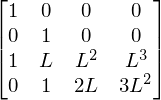

In [5]:
matM = Matrix.vstack(funciones.subs(x,0),Dfunciones.subs(x,0),funciones.subs(x,L),Dfunciones.subs(x,L))
matM

A continuación se evalúa la expresión simbólica de la inversa.

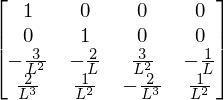

In [6]:
Inv_matM = matM.inv()
Inv_matM

## Definición de las funciones de forma

La matriz $\mathbf{M}^{-1}$ contiene, por columnas, los coeficientes que definen las funciones de forma. 

Para obtener las funciones de forma, basta multiplicar la base de funciones por los coeficientes (columnas) de esta matriz inversa. 

In [7]:
h1 = funciones.dot(Inv_matM.col(0))
h2 = funciones.dot(Inv_matM.col(1))
h3 = funciones.dot(Inv_matM.col(2))
h4 = funciones.dot(Inv_matM.col(3))

Función h1(x) = 1 - 3*x**2/L**2 + 2*x**3/L**3


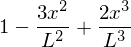

In [8]:
print 'Función h1(x) =', h1
h1

Función h2(x) = x - 2*x**2/L + x**3/L**2


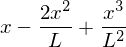

In [9]:
print 'Función h2(x) =', h2
h2

Función h3(x) = 3*x**2/L**2 - 2*x**3/L**3


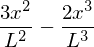

In [10]:
print 'Función h3(x) =', h3
h3

Función h4(x) =  -x**2/L + x**3/L**2


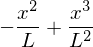

In [11]:
print 'Función h4(x) = ', h4
h4

Las funciones de forma tienen, por tanto, las siguientes expresiones: 

\begin{align}
h_1(x)&  = 1 - \frac{3 x^{2}}{L^{2}} + \frac{2 x^{3}}{L^{3}} \\
h_2(x)& = x - \frac{2 x^{2}}{L} + \frac{x^{3}}{L^{2}} \\
h_3(x)& = \frac{3 x^{2}}{L^{2}} - \frac{2 x^{3}}{L^{3}} \\
h_4(x)& = - \frac{x^{2}}{L} + \frac{x^{3}}{L^{2}}
\end{align}

Para obtener estas expresiones formateadas se ha usado el comando print latex(), que devuelve los comandos de $\LaTeX$ necesarios para escribir las ecuaciones. 

In [12]:
print latex(h1)
print latex(h2)
print latex(h3)
print latex(h4)

1 - \frac{3 x^{2}}{L^{2}} + \frac{2 x^{3}}{L^{3}}
x - \frac{2 x^{2}}{L} + \frac{x^{3}}{L^{2}}
\frac{3 x^{2}}{L^{2}} - \frac{2 x^{3}}{L^{3}}
- \frac{x^{2}}{L} + \frac{x^{3}}{L^{2}}


## Dibujo de las funciones de forma hermíticas

A continuación se dibujan las funciones de forma. Puesto que éstas dependen de $L$, se ha tomado el intervalo $L=1$ para tener una referencia. 

La librería SymPy tiene sus propias funciones de dibujo. 

Para que se muestren dentro del cuaderno, se cargan las opciones de mostrar "en línea". 

`%matplotlib` prevents importing * from pylab and numpy
/home/alex/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


Populating the interactive namespace from numpy and matplotlib


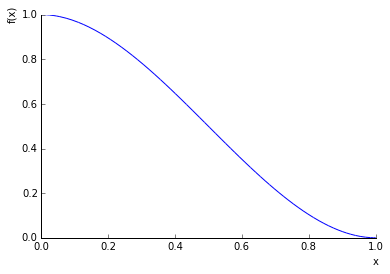

In [13]:
%pylab inline
from sympy.plotting import plot

p1 = plot(h1.subs('L',1),(x,0,1))

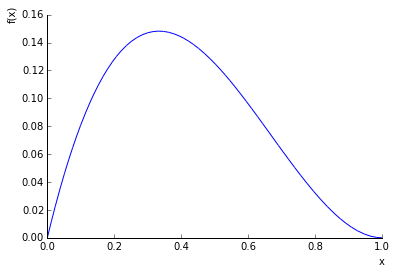

In [14]:
plot (h2.subs('L',1),(x,0,1))

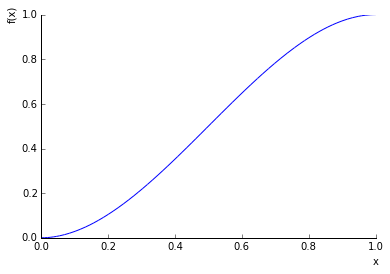

In [15]:
plot (h3.subs('L',1),(x,0,1))

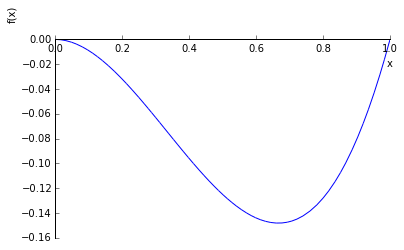

In [16]:
plot (h4.subs('L',1),(x,0,1))

## Funciones de forma en coordenadas naturales

En coordenadas naturales $\xi$, con $\xi \in [-1,1]$ las funciones de forma pueden definirse de forma análoga. 

La base en esta ocasión está formada por las funciones $\lbrace1,\xi,\xi^2,\xi^3 \rbrace$.

En esta ocasión se evalúa en los extremos del intervalo. 

Estas funciones pueden obtenerse mediante un procedimiento análogo al visto anteriormente, teniendo en cuenta que se debe evaluar en los extremos $\xi = -1$ y $\xi = 1$. 

Para trabajar en simbólico se establecerá el símbolo $t$ para la letra $\xi$. 

In [17]:
t = Symbol('t')
base_nat = Matrix([[1, t, t**2, t**3]])
base_nat

In [18]:
Dbase_nat = base_nat.diff(t)
Dbase_nat

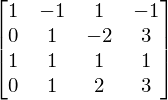

In [19]:
matM_nat = Matrix.vstack(base_nat.subs(t,-1),Dbase_nat.subs(t,-1),base_nat.subs(t,1),Dbase_nat.subs(t,1))
matM_nat

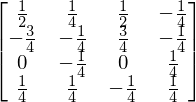

In [20]:
Inv_matM_nat = matM_nat.inv()
Inv_matM_nat

Expresión de las funciones de forma en coordenadas naturales

In [21]:
N1 = base_nat.dot(Inv_matM_nat.col(0))
N2 = base_nat.dot(Inv_matM_nat.col(1))
N3 = base_nat.dot(Inv_matM_nat.col(2))
N4 = base_nat.dot(Inv_matM_nat.col(3))

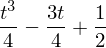

In [22]:
N1

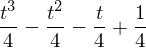

In [23]:
N2

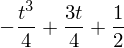

In [24]:
N3

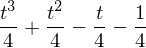

In [25]:
N4

Nótese que las funciones $N_2(t)$ y $N_4(t)$ proporcionan un giro unitario en la variable $t$, pero no en la variable $x$. 

Sustituyendo la variable $t$ por $\xi$, podemos escribir las cuatro funciones de forma como sigue: 

\begin{align}
N_1(\xi) & = \frac{\xi^{3}}{4} - \frac{3 \xi}{4} + \frac{1}{2} \\
N_2(\xi) & = \frac{\xi^{3}}{4} - \frac{\xi^{2}}{4} - \frac{\xi}{4} + \frac{1}{4} \\
N_3(\xi) & = -\frac{\xi^{3}}{4} + \frac{3 \xi}{4} + \frac{1}{2} \\
N_4(\xi) & =  \frac{\xi^{3}}{4} + \frac{\xi^{2}}{4} - \frac{\xi}{4} - \frac{1}{4}
\end{align}

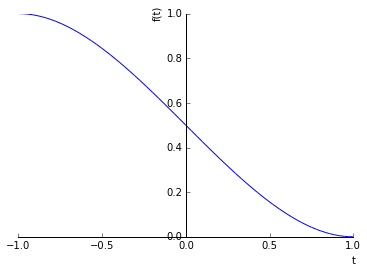

In [26]:
plot (N1,(t,-1,1))

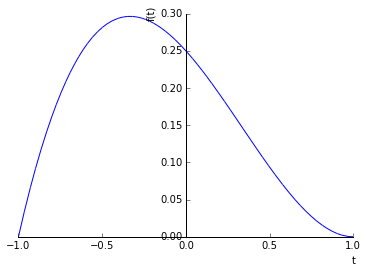

In [27]:
plot (N2,(t,-1,1))

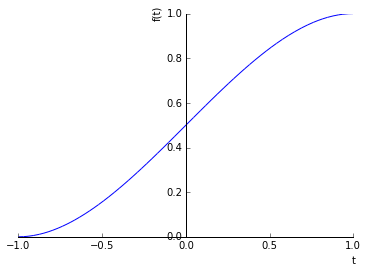

In [28]:
plot (N3,(t,-1,1))

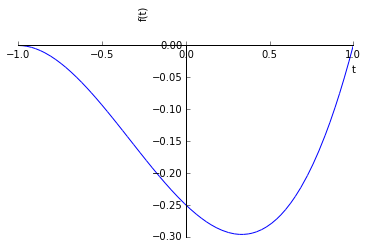

In [29]:
plot (N4,(t,-1,1))

## Ejercicios



### Ejercicio 1
Determine las funciones de forma asociadas a una base lagrangiana de polinomios de grado 4, asociada a los 5 puntos $x= \lbrace 0, \dfrac{L}{4}, \dfrac{L}{2}, \dfrac{3L}{4}, L \rbrace$.

#### Solución 

Consideremos los puntos de evaluación. Procediendo según se vio anteriormente, se obtiene la matriz $\mathbf{M}$ y su inversa. En esta base lagrangiana, la función de forma de índice $i$ debe tomar valor 1 en el punto $i$, y cero en el resto. 

In [30]:
puntos = [0, L/4, L/2, 3*L/4, L]

In [31]:
base = Matrix([[1,x,x**2,x**3,x**4]])
base

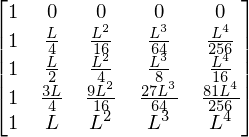

In [32]:
matM = Matrix.vstack(base.subs(x,puntos[0]), base.subs(x,puntos[1]), base.subs(x,puntos[2]), base.subs(x,puntos[3]),
                    base.subs(x,puntos[4]))
matM

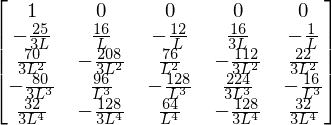

In [33]:
Inv_matM = matM.inv()
Inv_matM

In [34]:
f1 = base.dot(Inv_matM.col(0))
f2 = base.dot(Inv_matM.col(1))
f3 = base.dot(Inv_matM.col(2))
f4 = base.dot(Inv_matM.col(3))
f5 = base.dot(Inv_matM.col(4))

A continuación se muestran las funciones de forma; para una mejor visualización se define un vector y se muestran por columnas. 

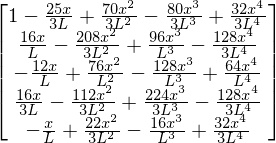

In [35]:
fforma = Matrix([f1,f2,f3,f4,f5])
fforma

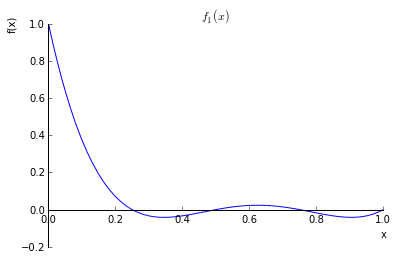

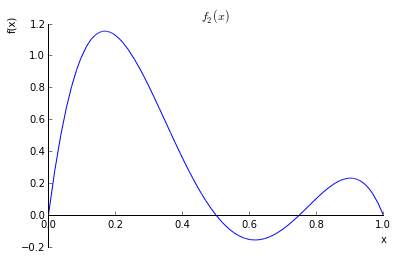

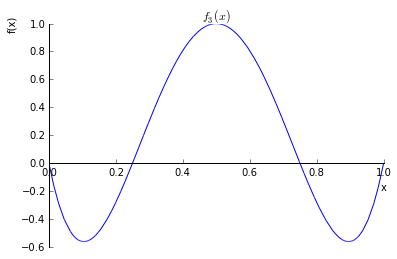

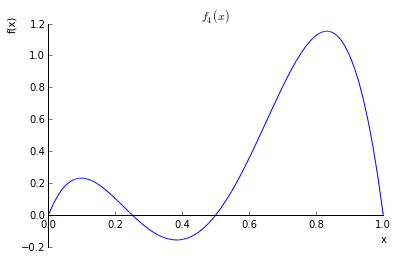

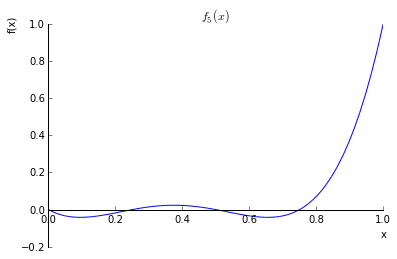

In [36]:
plot(f1.subs(L,1),(x,0,1),title="$f_1(x)$")
plot(f2.subs(L,1),(x,0,1),title="$f_2(x)$")
plot(f3.subs(L,1),(x,0,1),title="$f_3(x)$")
plot(f4.subs(L,1),(x,0,1),title="$f_4(x)$")
plot(f5.subs(L,1),(x,0,1),title="$f_5(x)$")

### Ejercicio 2
Determine las funciones de forma asociadas a una base de polinomios generados por la base $\mathcal{B} = \lbrace{1,x,x^2, x^4} \rbrace$ , con las mismas condiciones que el elemento hermítico visto anteriormente (desplazamientos y giros en los extremos del intervalo $[0,L]$).

Observación: Esta base representa una base incompleta de los polinomios de grado 4, pues falta el término $x^3$. 

#### Solución

Procediendo según lo visto anteriormente, se obtienen las cuatro funciones de forma. 

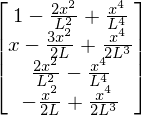

In [37]:
base = Matrix([[1,x,x**2,x**4]])
Dbase = base.diff(x)
matM = Matrix.vstack(base.subs(x,0), Dbase.subs(x,0),base.subs(x,L),Dbase.subs(x,L))
Inv_matM = matM.inv()
f1 = base.dot(Inv_matM.col(0))
f2 = base.dot(Inv_matM.col(1))
f3 = base.dot(Inv_matM.col(2))
f4 = base.dot(Inv_matM.col(3))

fforma = Matrix([f1,f2,f3,f4])

fforma


A continuación se dibujan las funciones de forma. Observe que se parecen mucho a las hermíticas, pero observando la matriz anterior, puede comprobar que no contienen términos en $x^3$. 

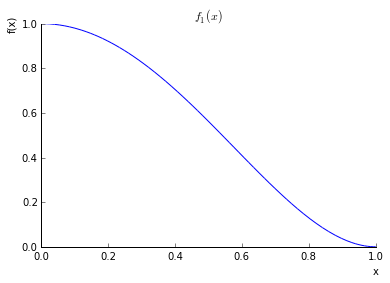

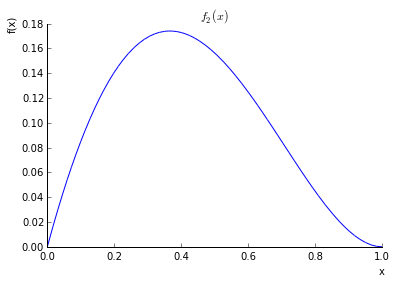

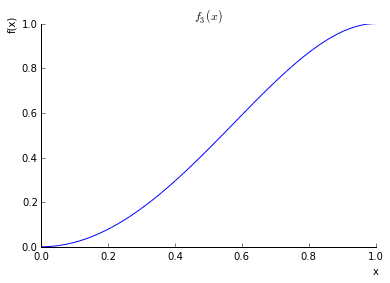

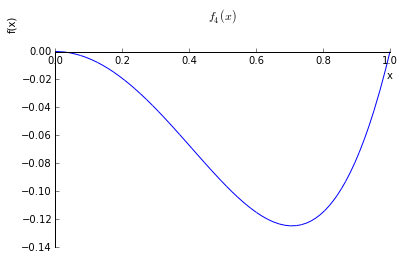

In [38]:
plot(f1.subs(L,1),(x,0,1),title="$f_1(x)$")
plot(f2.subs(L,1),(x,0,1),title="$f_2(x)$")
plot(f3.subs(L,1),(x,0,1),title="$f_3(x)$")
plot(f4.subs(L,1),(x,0,1),title="$f_4(x)$")